# Reaction-Diffusion Turing morph system simulation of animal skins

In [1]:
import sys
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())
sys.executable

/Users/srmedinac/Library/Jupyter


'/Library/Frameworks/Python.framework/Versions/3.7/bin/python3'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Agg')

## We define a function to determine what species and what generational skin we want to simulate

In [3]:

def species(species,age):
    #species 0 fish1 1 shark1 2 fish2 3 shark2
    #0 young 1 adult 2 elder
    change = np.random.random() / 10000.0
    if(species == 0):
        # change colormap of species
        color_map = plt.cm.hsv
        a = 2.8e-4 + change #random minimal change on constants for each individual
        b = 5e-3 + change
        if age == 0:
            T = 2
        elif age == 1:
            T = 5
        elif age == 2:
            T = 15        
    if(species == 1):
        # change colormap of species
        color_map = plt.cm.ocean
        a = 1.6e-4 + change
        b = 0.8e-3 + change
        if age == 0:
            T = 2
        elif age == 1:
            T = 7
        elif age == 2:
            T = 25
    if(species == 2):
        # change colormap of species
        color_map = plt.cm.BrBG
        a = 2.8e-4 + change #random minimal change on constants for each individual
        b = 5e-3 + change
        if age == 0:
            T = 2
        elif age == 1:
            T = 7
        elif age == 2:
            T = 25
    if(species == 3):
        # change colormap of species
        color_map = plt.cm.twilight
        a = 1.6e-4 + change #random minimal change on constants for each individual
        b = 0.8e-3 + change
        if age == 0:
            T = 2
        elif age == 1:
            T = 7
        elif age == 2:
            T = 25
    return a,b,T,color_map
            
a,b,T,color_map = species(2,2)
print("Reaction-Difussion system const:\n")
print("a = "+str(a)+"\nb = " + str(b) + "\nTime = "+str(T))

#2.8e-4 and 5e-3 fish
#1.6e-4 and 0.8e-3 whale shark

Reaction-Difussion system const:

a = 0.0003668388897451189
b = 0.005086838889745119
Time = 25


In [4]:
tau = .1
k = -.005
size = 100  # size of the 2D grid
dx = 2. / size  # space step

In [5]:
dt = .001  # time step
n = int(T / dt)  # number of iterations

In [6]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [7]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [8]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=color_map,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

## Simulating the Partial Differential Equation with finite differences

In [9]:
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

## Plotting the skin and saving to file

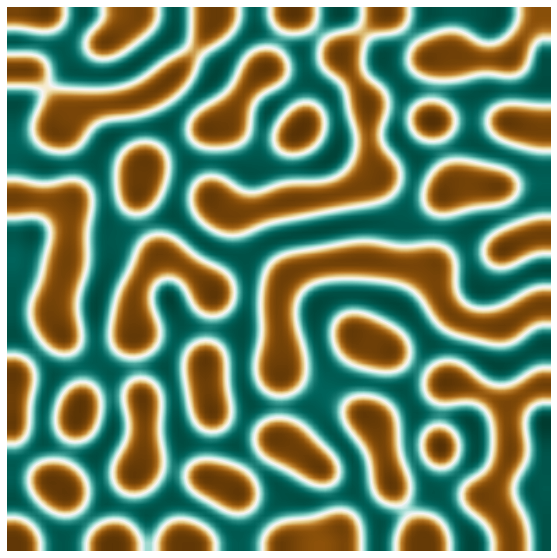

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
show_patterns(U, ax=ax)
#species 0 fish1 1 shark1 2 fish2 3 shark2
#0 young 1 adult 2 elder
#plt.savefig('prey2_skin_elder'+"19"+'.png', bbox_inches='tight')